<h1 align="center"  style="font-family:Fontin;color:#000066;font-size:24pt">Kalman Filters</h1> 

<h2 align="left"  style="font-family:Fontin;font-size:14pt">Kalman filters are used to estimate the true value from noisy measurements in real time.It is an iterative method with following steps.</h2> 


Prediction step:
Calculate the current state and its uncertainty using previous state and control parameters (physical model).<br>

$$
\begin{align*}
x_t^{predicted} &=F_tx_{t-1} + B_tu_t+w_t \\
P_t^{predicted} &=F_tP_{t-1}F^T_t+Q_t
\end{align*}
$$

$x_t$ : State vector containing position, velocity, temperature etc.<br>
$F_t$ : State transition matrix which governs the transition from one state to another.<br>
$u_t$ : Control vector containing control parameters such as applied forces voltages etc.<br>
$B_t$ : Control matrix governs how control parameters effect the state.<br>
$w_t$ : Process noise from controls etc<br>
$P_t$ : Covarience matrix of the state vector<br>
$Q_t$ : Covarience of the process noice<br>

Update step:
Update the predicted state and its uncertanity using the measurement input from sensor.<br>
Our measurements will have the following form.
$$z_t=H_tx_t+v_t$$

$z_t$ : Measurement vector<br>
$H_t$ : Matrix that maps state to measurement space<br>
$v_t$ : Measurement noise<br>

To update the state vector using measurements,

$$
\begin{align*}
x_t &=x_t^{predicted}+K_t(z_t-H_tx_t^{predicted})\\
P_t &=P_t^{predicted}-K_tH_tP_t^{predicted}\\
K_t &=P_t^{predicted}H_t^T(H_tP_t^{predicted}H_t^T+R_t)^{-1}
\end{align*}
$$

$K_t$ : Kalman gain <br>
$R_t$ : Covarience of the measurement noise<br>
<br>
<h2 align="left"  style="font-family:Fontin;font-size:14pt">Lets look at a simple example of estimating a constant temperature using a noisy signal coming from a temperature sensor.</h2> 

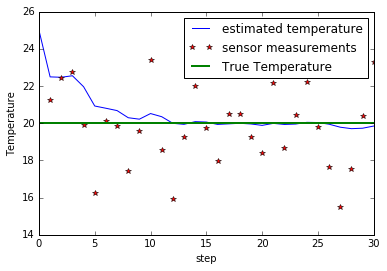

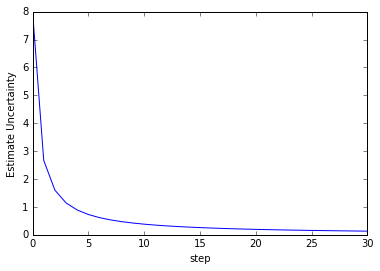

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Let the true temperature be 20C
T=20
#Lets create some data for the noisy measurements coming from the temperature sensor
dT_mea=2 # error of measurements = 4
T_mea = np.random.normal(20,dT_mea,30)

T_est=25 # Initial estimate of the temperature= 25
dT_est=8.0 # Uncertainty (variance) of the Initial estimate of the temperature

T_filtered=[T_est]
dT_filtered=[dT_est]
#Now we follow the above steps iteratively.

L=len(T_mea)
for i in range(L):
    # First step:
        # in this example we assume there is no change in the true temperature being measured,
        # no control variable to change the temperature
    # Second step:
        #Update the predicted state using measurements.
    
    K_gain=dT_est/(dT_est+dT_mea**2)
    T_est=T_est+K_gain*(T_mea[i]-T_est)
    dT_est=(1-K_gain)*dT_est
    T_filtered.append(T_est)
    dT_filtered.append(dT_est)
    

plt.plot(range(L+1),T_filtered,'b-',label='estimated temperature')
plt.plot(range(1,L+1),T_mea,'r*',label='sensor measurements')
plt.axhline(y=20,linewidth=2, color='g',label='True Temperature')
plt.legend(loc='upper right')
plt.ylabel('Temperature')
plt.xlabel('step')
plt.show()
plt.plot(range(L+1),dT_filtered,'b-')
plt.ylabel('Estimate Uncertainty')
plt.xlabel('step')
plt.show()

###Lets look at the two dimentional projectile of an object.
Equation of motion for a projectile can be written as:

$$
\begin{align*}
x_t &=x_{t-1}+V_{x,t-1}\Delta t\\
V_{x,t} &=V_{x,t-1}\\
y_t &=y_{t-1}+V_{y,t-1}\Delta t-\frac{1}{2}g\Delta t^2\\
V_{y,t} &=V_{y,t-1}-g\Delta t\\
\end{align*}
$$

Writing these in matrix form:

$$ x_t^{predicted}=F_tx_{t-1} + B_tu_t+w_t $$
$$
\begin{equation}
\begin{bmatrix}
x_t\\ 
V_{x,t}\\ 
y_t\\ 
V_{y,t}
\end{bmatrix}=
\begin{bmatrix}
1 &\Delta t  &0  &0 \\ 
0 & 1 & 0 & 0\\ 
0 & 0 & 1 & \Delta t\\ 
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_{t-1}\\ 
V_{x,t-1}\\ 
y_{t-1}\\ 
V_{y,t-1}
\end{bmatrix}+
\begin{bmatrix}
\frac{1}{2}\Delta t^2 & 0\\ 
\Delta t & 0\\ 
0 &\frac{1}{2}\Delta t^2  \\ 
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
0\\ 
-g
\end{bmatrix}
\end{equation}
$$

Equation for the covarience of the state vector is written as:

$$P_t=F_tP_{t-1}F^T_t+Q_t$$

Where
$$
\begin{align*}
P &= 
\begin{bmatrix}
var(x) & cov(x,v_x) & cov(x,y) & cov(x,v_y)\\ 
cov(v_x,x) & var(v_x) & cov(v_x,y) & cov(v_x,v_y) \\ 
cov(y,x) & cov(y,v_x) & var(y) & cov(y,v_y)\\ 
cov(v_y,x) & cov(v_y,v_x) & cov(v_y,y) & var(v_y)
\end{bmatrix}\\
F &=
\begin{bmatrix}
1 &\Delta t  &0  &0 \\ 
0 & 1 & 0 & 0\\ 
0 & 0 & 1 & \Delta t\\ 
0 & 0 & 0 & 1
\end{bmatrix}\\
Q &= 
\begin{bmatrix}
0 & 0 &0  &0 \\ 
0 & 0 &0  &0 \\ 
0 & 0 &0  &0 \\ 
0 & 0 &0  &0
\end{bmatrix} 
\end{align*}
$$
Assuming no process error.

Calculating the Kalman gain:

$$K_t=P_t^{predicted}H_t^T(H_tP_t^{predicted}H_t^T+R_t)^{-1}$$
Where 
$$
\begin{align*}
H &=
\begin{bmatrix}
1 & 0  &0  &0 \\ 
0 & 1 & 0 & 0\\ 
0 & 0 & 1 & 0\\ 
0 & 0 & 0 & 1
\end{bmatrix}\\
R &= 
\begin{bmatrix}
var(x_{mes}) & 0 & 0 & 0\\ 
0 & var(v_{x,mes}) & 0 & 0 \\ 
0 & 0 & var(y_{mes}) & 0\\ 
0 & 0 & 0 & var(v_{y,mes})
\end{bmatrix} 
\end{align*}
$$

Finally using Kalman gain to update state and its uncertainty

$$
\begin{align*}
x_t &=x_t^{predicted}+K_t(z_t-H_tx_t^{predicted})\\
P_t &=P_t^{predicted}-K_tH_tP_t^{predicted}
\end{align*}
$$

###Lets demonstrate this in Python code

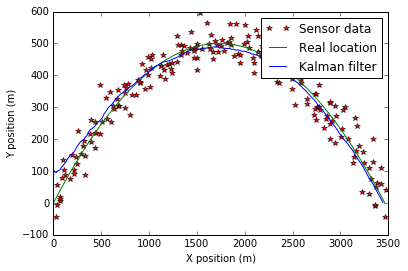

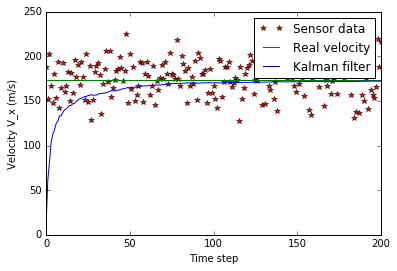

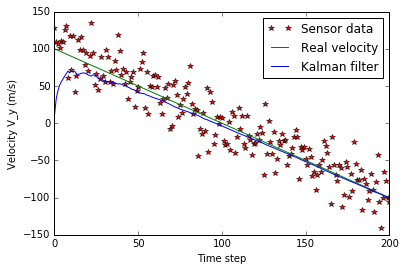

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# inital position (0,0)
x_0=0
y_0=0
# inital speed and angle with horizontal in radiens
v0=200 # in m/s
theta=math.pi/6 # 30 degrees

# initial velocity components
vx_0=v0*math.cos(theta)
vy_0=v0*math.sin(theta)

g=10 #m/s^2
t=20 # simulate from t=0 to t=20 seconds
dt=0.1 # time step
T=np.arange(0,t+dt,dt) 


# Calculate true values (r:real)
vx_r=[vx_0 for i in T]
vy_r=[vy_0-g*i for i in T]
x_r=[x_0+i*vx_0  for i in T]
y_r=[y_0+i*vy_0-0.5*g*i**2  for i in T]

# Generate sensor measurements
dv_s=20
dx_s=40
dy_s=40
vx_s=np.random.normal(vx_0,dv_s,len(T))
vy_s=[vy_0-g*i + np.random.normal(0,dv_s)for i in T]
x_s=[x_0+i*vx_0 + np.random.normal(0,dx_s) for i in T]
y_s=[y_0+i*vy_0-0.5*g*i**2 + np.random.normal(0,dy_s) for i in T]


# Initial estimates for kalman filter:
x0_k=10
y0_k=100
vx0_k=10
vy0_k=10


# Initial state vector
X=np.matrix([[x0_k],[vx0_k],[y0_k],[vy0_k]])

# Define the matrices used in Kalman filter

F=np.matrix([[1, dt, 0, 0],[0, 1, 0, 0],[0, 0, 1, dt],[0, 0, 0, 1]])
B=np.matrix([[0.5*dt**2, 0],[dt, 0],[0, 0.5*dt**2],[0, dt]])
u=np.matrix([[0],[-g]])
Q=np.zeros((4,4))           
H=np.matrix('1 0 0 0;0 1 0 0;0 0 1 0;0 0 0 1')
R=np.matrix([[dx_s**2, 0, 0, 0],[0, dv_s**2, 0, 0],[0, 0, dy_s**2, 0],[0, 0, 0, dv_s**2]])
# R=np.matrix([[0.2,0,0,0],[0,0.2,0,0],[0,0,0.2,0],[0,0,0,0.2]])
P=np.matrix('10 0 0 0;0 160 0 0;0 0 100 0;0 0 0 100')
states=[X.tolist()]
state_cov=[P.tolist()]

for i in range(len(T)):
    X_pre=F*X+B*u
    P_pre=F*P*F.T
    K=P_pre*H.T*(H*P_pre*H.T+R).I
    Z=np.matrix([[x_s[i]],[vx_s[i]],[y_s[i]],[vy_s[i]]])
    X=X_pre+K*(Z-H*X_pre)
    P=P_pre-K*H*P_pre
    states.append(X.tolist())
    state_cov.append(P.tolist())
    
x_k=[states[i][0] for i in range(len(T))]
y_k=[states[i][2] for i in range(len(T))]
vx_k=[states[i][1] for i in range(len(T))]
vy_k=[states[i][3] for i in range(len(T))]

var_x=[state_cov[i][0][0] for i in range(len(T))]
var_y=[state_cov[i][2][2] for i in range(len(T))]
var_vx=[state_cov[i][1][1] for i in range(len(T))]
var_vy=[state_cov[i][3][3] for i in range(len(T))]


plt.plot(x_s,y_s,'r*',label='Sensor data')
plt.plot(x_r,y_r,'g-',label='Real location')
plt.plot(x_k,y_k,'b-',label='Kalman filter')
plt.legend()
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.show()

plt.plot(vx_s,'r*',label='Sensor data')
plt.plot(vx_r,'g-',label='Real velocity')
plt.plot(vx_k,'b-',label='Kalman filter')
plt.legend()
plt.ylabel('Velocity V_x (m/s)')
plt.xlabel('Time step')
plt.show()

plt.plot(vy_s,'r*',label='Sensor data')
plt.plot(vy_r,'g-',label='Real velocity')
plt.plot(vy_k,'b-',label='Kalman filter')
plt.legend()
plt.ylabel('Velocity V_y (m/s)')
plt.xlabel('Time step')
plt.show()

